<a href="https://colab.research.google.com/github/qwert0242/2023-Fall-Stat/blob/main/2023%E7%B5%B1%E8%A8%88%E5%B0%88%E9%A1%8C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

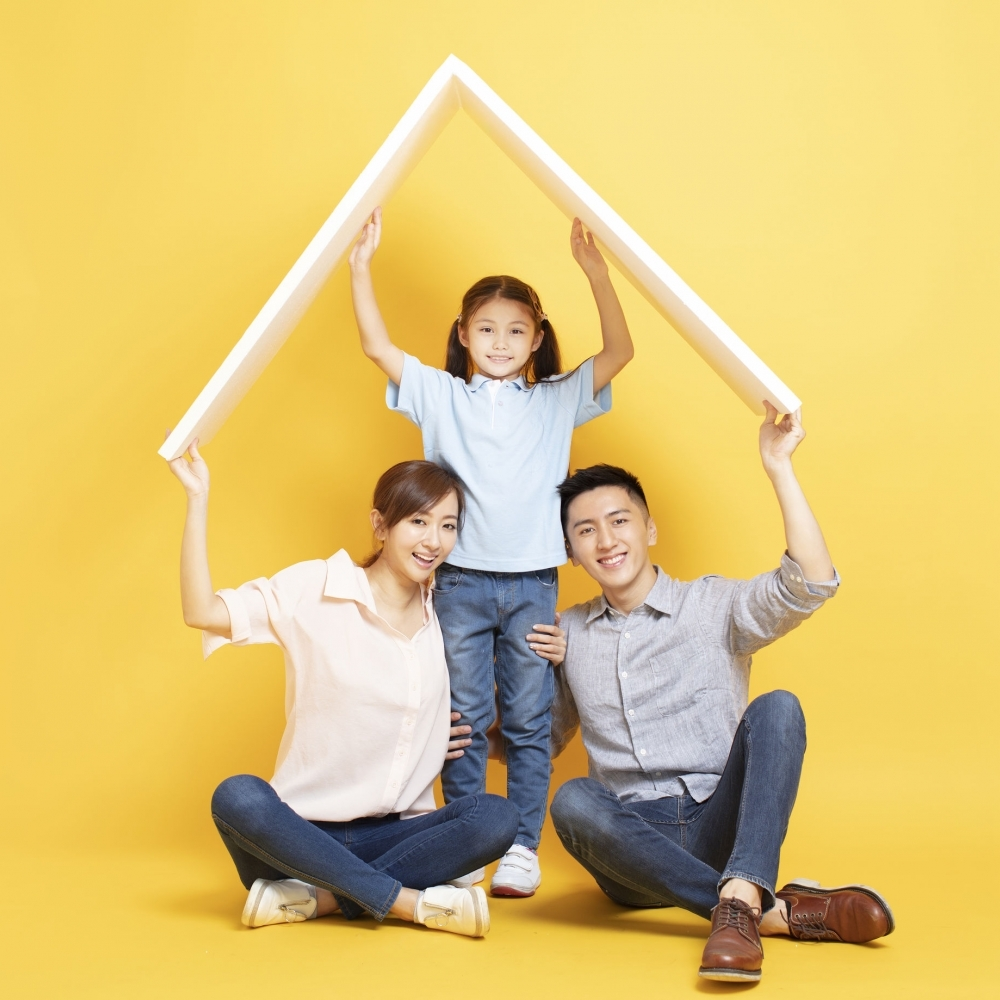

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
import numpy as np
import scipy.stats as stats
from scipy.stats import pearsonr

# 假設您的資料檔案為 CSV 格式
housing_data = pd.read_csv('房屋買賣移轉登記.csv')
income_data = pd.read_csv('家庭年所得.csv')

# 設定地區/年份為索引，以方便進行合併或計算
housing_data = housing_data.set_index('Area').transpose()
income_data = income_data.set_index('Area').transpose()

# 計算成長率的函數
def calculate_growth_rate(data):
    return data.pct_change() * 100  # 以百分比形式表示

# 計算房屋移轉次數的成長率
housing_growth_rate = calculate_growth_rate(housing_data)

# 計算家庭年所得的成長率
income_growth_rate = calculate_growth_rate(income_data)

# 合併兩個成長率的資料框
merged_growth_rate = pd.concat([housing_growth_rate, income_growth_rate], axis=1, keys=['Housing', 'Income'])

# 排除包含NaN的行
merged_growth_rate = merged_growth_rate.dropna()

# 分開成兩個表格
housing_table = merged_growth_rate['Housing'].style.set_caption('Housing Growth Rate').format("{:.2f}%")
income_table = merged_growth_rate['Income'].style.set_caption('Income Growth Rate').format("{:.2f}%")

# 顯示兩個表格
display(housing_table)
display(income_table)

Area,Taipei,New_Taipei,Taoyuan,Taichung,Tainan,Kaohsiung
2019,3.40%,5.97%,16.78%,9.13%,10.31%,11.95%
2020,12.39%,5.52%,13.19%,11.94%,-0.60%,2.74%
2021,-0.89%,7.81%,2.45%,2.81%,16.09%,17.32%
2022,-7.41%,-11.88%,-6.18%,1.41%,-13.68%,-17.33%


Area,Taipei,New_Taipei,Taoyuan,Taichung,Tainan,Kaohsiung
2019,4.47%,2.10%,0.98%,1.46%,-0.64%,0.44%
2020,-0.37%,2.48%,2.29%,-0.68%,0.68%,-0.05%
2021,0.90%,2.15%,1.75%,1.15%,3.14%,0.61%
2022,1.17%,2.88%,0.04%,2.63%,2.06%,2.56%


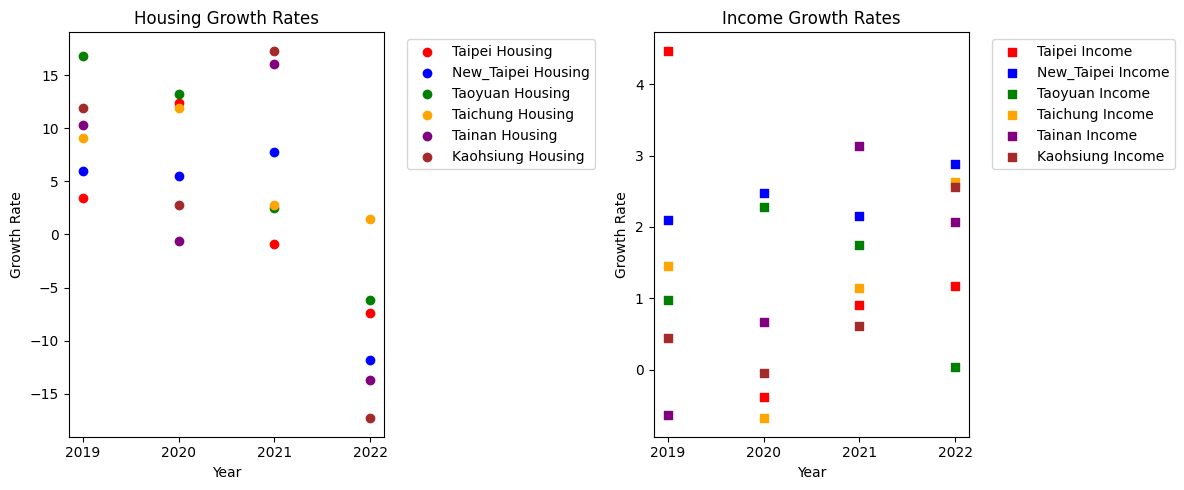

In [ ]:
# 設置顏色
colors = ['red', 'blue', 'green', 'orange', 'purple', 'brown']

# 創建 subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

# 繪製第一個子圖 (Housing)
for i, area in enumerate(merged_growth_rate.columns.get_level_values(1).unique()):
    axes[0].scatter(merged_growth_rate.index, merged_growth_rate['Housing', area], label=f'{area} Housing', color=colors[i])

axes[0].set_title('Housing Growth Rates')
axes[0].set_xlabel('Year')
axes[0].set_ylabel('Growth Rate')
axes[0].legend(title='Area')

# 繪製第二個子圖 (Income)
for i, area in enumerate(merged_growth_rate.columns.get_level_values(1).unique()):
    axes[1].scatter(merged_growth_rate.index, merged_growth_rate['Income', area], label=f'{area} Income', marker='s', color=colors[i])

axes[1].set_title('Income Growth Rates')
axes[1].set_xlabel('Year')
axes[1].set_ylabel('Growth Rate')
axes[1].legend(title='Area')

# 調整圖例位置
axes[0].legend(bbox_to_anchor=(1.05, 1), loc='upper left')
axes[1].legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# 顯示圖形
plt.tight_layout()
plt.show()



In [ ]:
# 計算相關性係數
correlation = housing_growth_rate.corrwith(income_growth_rate)

# 顯示相關性係數
print("相關性係數:")
print(correlation)

相關性係數:
Area
Taipei       -0.204014
New_Taipei   -0.906212
Taoyuan       0.569396
Taichung     -0.806917
Tainan       -0.008659
Kaohsiung    -0.795767
dtype: float64


In [ ]:
'''
台北地區 (Taipei)：
觀察： 家庭所得增加與房屋買賣移轉成長率下降呈負相關。
可能原因： 可能是由於房價高昂，導致高所得家庭選擇保持現有房產，而不是進行房地產交易。

新北市地區 (New Taipei)：
觀察： 家庭所得增加與房屋買賣移轉成長率急劇下降呈強烈負相關。
可能原因： 可能受到政府政策、土地供應、或其他地方經濟因素的影響，使得高收入家庭不願進行大量的房地產交易。

桃園地區 (Taoyuan)：
觀察： 家庭所得增加與房屋買賣移轉成長率增加呈正相關。
可能原因： 可能由於桃園地區的經濟活動蓬勃，且土地供應相對充足，吸引了更多高收入家庭進行房地產交易。

台中地區 (Taichung)：
觀察： 家庭所得增加與房屋買賣移轉成長率急劇下降呈強烈負相關。
可能原因： 可能受到土地供應、房價調整、或其他經濟因素的影響，使得高收入家庭不願進行房地產交易。

台南地區 (Tainan)：
觀察： 家庭所得成長率與房屋買賣移轉成長率相關性較弱。
可能原因： 可能是由於台南地區的市場特性，使得家庭所得變動對房地產市場的影響相對較小。

高雄地區 (Kaohsiung)：
觀察： 家庭所得增加與房屋買賣移轉成長率急劇下降呈強烈負相關。
可能原因： 可能受到地區經濟結構、土地供應、或其他市場因素的影響，使得高收入家庭對房地產市場的參與下降。
'''

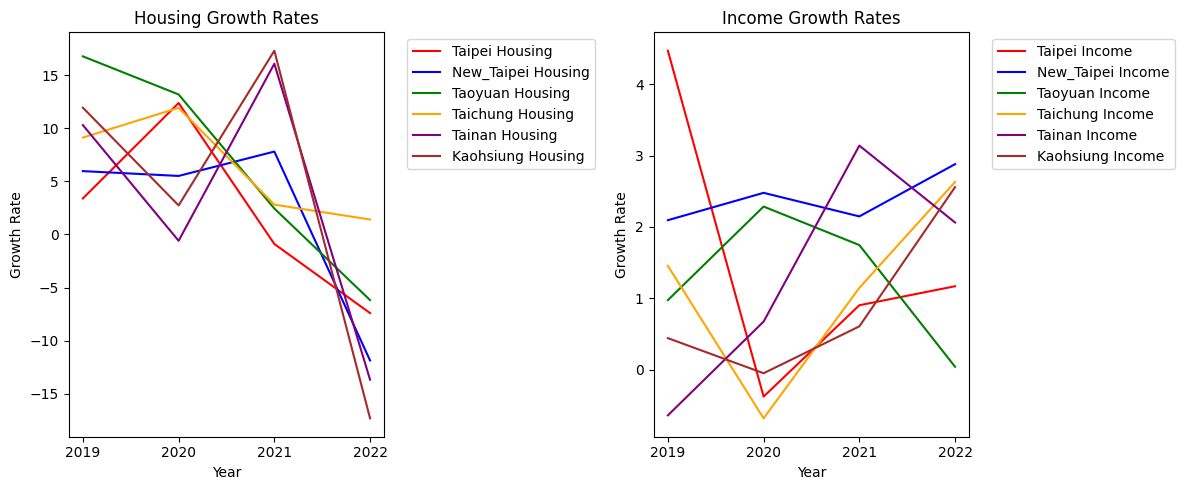

In [ ]:
# 設置顏色
colors = ['red', 'blue', 'green', 'orange', 'purple', 'brown']

# 創建 subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

# 繪製第一個子圖 (Housing)
for i, area in enumerate(merged_growth_rate.columns.get_level_values(1).unique()):
    axes[0].plot(merged_growth_rate.index, merged_growth_rate['Housing', area], label=f'{area} Housing', color=colors[i])

axes[0].set_title('Housing Growth Rates')
axes[0].set_xlabel('Year')
axes[0].set_ylabel('Growth Rate')
axes[0].legend(title='Area')

# 繪製第二個子圖 (Income)
for i, area in enumerate(merged_growth_rate.columns.get_level_values(1).unique()):
    axes[1].plot(merged_growth_rate.index, merged_growth_rate['Income', area], label=f'{area} Income', color=colors[i])

axes[1].set_title('Income Growth Rates')
axes[1].set_xlabel('Year')
axes[1].set_ylabel('Growth Rate')
axes[1].legend(title='Area')

# 調整圖例位置
axes[0].legend(bbox_to_anchor=(1.05, 1), loc='upper left')
axes[1].legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# 顯示圖形
plt.tight_layout()
plt.show()



In [ ]:
'''
在 2021 年和 2022 年期間，台灣房市受到了多重因素的影響，導致房屋買賣移轉棟數下降。這些因素包括：
央行連續升息，抑制房貸需求。
政府出台多項打炒房政策，打擊投機炒作。
新冠疫情反覆，影響經濟發展和民眾購房意願。

'''

In [ ]:
# Housing Growth Rate 的統計描述
housing_stat = merged_growth_rate['Housing'].describe()

# Income Growth Rate 的統計描述
income_stat = merged_growth_rate['Income'].describe()

# 顯示統計描述
print("Housing Growth Rate Statistics:")
print(housing_stat)

print("\nIncome Growth Rate Statistics:")
print(income_stat)

Housing Growth Rate Statistics:
Area      Taipei  New_Taipei    Taoyuan   Taichung     Tainan  Kaohsiung
count   4.000000    4.000000   4.000000   4.000000   4.000000   4.000000
mean    1.869586    1.855255   6.560402   6.321999   3.029286   3.668011
std     8.301530    9.208192  10.453930   5.028442  13.115736  15.237269
min    -7.410763  -11.876418  -6.183938   1.410282 -13.684958 -17.328552
25%    -2.523794    1.167233   0.289967   2.461141  -3.867707  -2.278447
50%     1.250198    5.742396   7.820639   5.970581   4.855572   7.342080
75%     5.643577    6.430418  14.091075   9.831440  11.752564  13.288538
max    12.388711    7.812648  16.784268  11.936553  16.090956  17.316436

Income Growth Rate Statistics:
Area     Taipei  New_Taipei   Taoyuan  Taichung    Tainan  Kaohsiung
count  4.000000    4.000000  4.000000  4.000000  4.000000   4.000000
mean   1.542427    2.400263  1.263601  1.139300  1.310781   0.891532
std    2.062821    0.361547  0.974489  1.369337  1.643089   1.145522
min

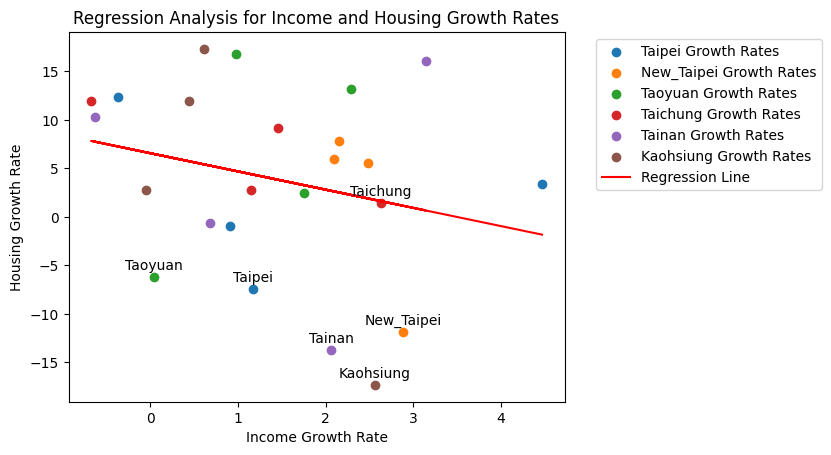

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.064
Model:                            OLS   Adj. R-squared:                  0.021
Method:                 Least Squares   F-statistic:                     1.499
Date:                Sun, 03 Dec 2023   Prob (F-statistic):              0.234
Time:                        12:54:32   Log-Likelihood:                -87.292
No. Observations:                  24   AIC:                             178.6
Df Residuals:                      22   BIC:                             180.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.5607      2.936      2.235      0.0

In [ ]:
# 選擇要進行回歸分析的資料
X = merged_growth_rate['Income'].values.flatten()
y = merged_growth_rate['Housing'].values.flatten()

# 添加截距項目
X = sm.add_constant(X)

# 創建模型
model = sm.OLS(y, X)

# 適配模型
results = model.fit()

# 繪製散點圖
for area in merged_growth_rate.columns.get_level_values(1).unique():
    plt.scatter(merged_growth_rate['Income', area], merged_growth_rate['Housing', area], label=f'{area} Growth Rates')

# 繪製回歸線
plt.plot(X[:, 1], results.predict(), label='Regression Line', color='red')

# 添加標籤到每個點
for area in merged_growth_rate.columns.get_level_values(1).unique():
    x_label, y_label = merged_growth_rate['Income', area].iloc[-1], merged_growth_rate['Housing', area].iloc[-1]
    plt.annotate(area, (x_label, y_label), textcoords="offset points", xytext=(0, 5), ha='center')

# 調整標籤位置
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.title('Regression Analysis for Income and Housing Growth Rates')
plt.xlabel('Income Growth Rate')
plt.ylabel('Housing Growth Rate')
plt.show()

# 顯示回歸統計
print(results.summary())

In [ ]:
# 顯示截距、斜率和殘差
intercept, slope = results.params
residuals = results.resid

print(f"Intercept: {intercept:.4f}")
print(f"Slope: {slope:.4f}")
print("Residuals:")
print(residuals)


Intercept: 6.5607
Slope: -1.8788
Residuals:
[  5.22654014   3.34570536  12.05871706   5.30412736   2.55166504
   6.2207349    5.12694264   3.61019745  10.9278289    4.10309312
  -5.88490005  -3.90953395  -5.75520431   5.28786609  -0.82998056
  -1.59209379  15.42779595  11.90105189 -11.77120379 -13.02738084
 -12.6616041   -0.20789789 -16.36950847 -19.08295813]


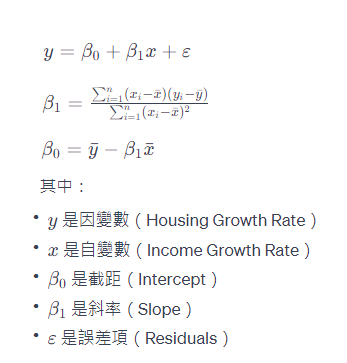

In [ ]:
'''
[收入成長率和房屋成長率呈現負相關]
2019年到2022年台灣六都的家庭年所得成長率呈現逐漸下降的趨勢，而房屋買賣移轉棟數成長率則呈現先上升後下降的趨勢。
這表明，家庭收入的增長與房屋買賣移轉棟數成長率之間的關係可能存在一定的滯後效應。

'''

In [ ]:
# 取得斜率的標準誤
standard_error_slope = results.bse[1]

print(f"斜率的標準誤: {standard_error_slope}")

# 進行假設檢定
print("\nHypothesis Testing for the Slope (beta1):")
print(f"t-statistic: {results.tvalues[1]}")
print(f"P-value: {results.pvalues[1]}")

# 判斷是否拒絕虛無假設
alpha = 0.05
if results.pvalues[1] < alpha:
    print("拒絕虛無假設，迴歸係數顯著不為零")
else:
    print("未能拒絕虛無假設，迴歸係數為零")

斜率的標準誤: 1.5342858030873918

Hypothesis Testing for the Slope (beta1):
t-statistic: -1.2245112907376712
P-value: 0.2337103386734969
未能拒絕虛無假設，迴歸係數為零


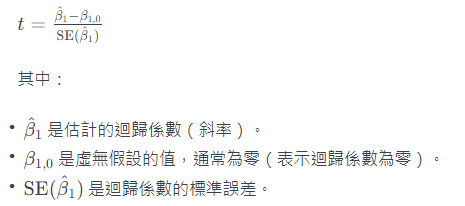


y = 6.5607−1.8788x +ε
<br>假設:
<br>H0: β1 = 0

<bf>H1: β1 ≠ 0
<br>截距值 6.5607 表示，當家庭年所得成長率為 0% 時，房屋買賣移轉棟數成長率的預期值為 6.5607%。斜率係數 -1.8788 表示，家庭年所得成長率每增加 1%，房屋買賣移轉棟數成長率就會減少 1.8788%。

---
[t檢定]
<br>自由度24-2=22
<br>Alpha＝0.05
<br>臨界值（查表）＝2.074
<br>|t|<臨界值 ;1.2245<2.074
<br>故不拒絕H0,無法確定家庭收入成長與房屋買賣移轉棟數成長的相關性。

---


